<img src="https://raw.githubusercontent.com/MLMI2-CSSI/foundry/main/assets/foundry-black.png" width=450>

# Foundry Solvation Energy Quickstart for Beginners

*Original Paper:* https://doi.org/10.1021/acs.jpca.1c01960

*Dataset:* https://doi.org/10.18126/c5z9-zej7



This introduction uses Foundry to:


1.   Instantiate and authenticate a Foundry client locally or in the cloud
2.   Aggregate data from the G4MP2 solvation database
3.   Perform basic data exploration



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MLMI2-CSSI/foundry/blob/main/examples/g4mp2-solvation/g4mp2_solvation_demo.ipynb)

This notebook is set up to run locally or as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.


In [1]:
try:
    import google.colab
    no_local_server = True
    no_browser = True
    globus = False
except: # when not in google colab
    no_local_server = False
    no_browser = False
    globus = True

# Environment Set Up
First we'll need to install Foundry as well as a few other packages. If you're using Google Colab, this code block will install these packages into the Colab environment.
If you are running locally, it will install these modules onto your machine if you do not already have them. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/bandgap) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

In [2]:
!pip install matplotlib
!pip install foundry_ml
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.3/292.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.5/111.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 28.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygithub to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

We need to import a few packages. We'll be using [Matplotlib](https://matplotlib.org/) to make visualizations of our data, [scikit-learn](https://scikit-learn.org/stable/) to create our model, and [pandas](https://pandas.pydata.org/) and [NumPy ](https://numpy.org/)to work with our data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

# Instantiate and Authenticate Foundry
Once the installations are complete, we can import Foundry.

In [4]:
from foundry import Foundry

We'll also need to instantiate it. To do so, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [5]:
f = Foundry(no_local_server=no_local_server, no_browser=no_browser, index="mdf")

Please paste the following URL in a browser:
https://auth.globus.org/v2/oauth2/authorize?client_id=984464e2-90ab-433d-8145-ac0215d26c8e&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=urn%3Aglobus%3Aauth%3Ascope%3Adata.materialsdatafacility.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fc17f27bb-f200-486a-b785-2a25e82af505%2Fconnect+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Asearch+https%3A%2F%2Fauth.globus.org%2Fscopes%2F56ceac29-e98a-440a-a594-b41e7a084b62%2Fall+urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2F81fc4156-a623-47f2-93ad-7184118226ba%2Fauth+openid+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ffacd7ccc-c5f4-42aa-916b-a0e270e2c2a9%2Fall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ff10a69a9-338c-4e5b-baa1-0dc92359ab47%2Fhttps+https%3A%2F%2Fauth.globus.org%2Fscopes%2F82f1b5c6-6e9b-11e5-ba47-22000b92c6ec%2Fhttps+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fd31d4f5d-be37-4adc-a761-2f716b7af105%2Facti

Load the Zeolite Database
Now that we've installed and imported everything we'll need, it's time to load the data. We'll be loading 1 dataset from Foundry using `f.load` to load the data and then `f.load_data` to load the data into the client.

In [6]:
f.load("10.18126/jos5-wj65", globus=globus)
res = f.load_data()

In [7]:
f

Foundry(dc={'identifier': {'identifier': '10.18126/jos5-wj65', 'identifierType': 'DOI'}, 'rightsList': [{'rights': 'CC-BY 4.0'}], 'creators': [{'familyName': 'Ward', 'givenName': 'Logan', 'creatorName': 'Ward, Logan', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Dandu', 'givenName': 'Naveen', 'creatorName': 'Dandu, Naveen', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Blaiszik', 'givenName': 'Ben', 'creatorName': 'Blaiszik, Ben', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Narayanan', 'givenName': 'Badri', 'creatorName': 'Narayanan, Badri', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Assary', 'givenName': 'Rajeev S.', 'creatorName': 'Assary, Rajeev S.', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Redfern', 'givenName': 'Paul C.', 'creatorName': 'Redfern, Paul C.', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Foster', 'givenName': 'Ian', 'creatorName': 'Foster, Ian', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}, {'familyName': 'Curtiss', 'givenName': 'Larry A.', 'creatorName': 'Curtiss, Larry A.', 'affiliations': ['Argonne National Laboratory', 'University of Chicago', 'University of Louisville']}], 'subjects': [{'subject': 'machine learning'}, {'subject': 'foundry'}], 'publicationYear': 2022, 'publisher': 'Materials Data Facility', 'dates': [{'date': '2022-01-24', 'dateType': 'Accepted'}], 'titles': [{'title': 'DFT Estimates of Solvation Energy in Multiple Solvents'}], 'resourceType': {'resourceTypeGeneral': 'Dataset', 'resourceType': 'Dataset'}}, mdf={'resource_type': 'dataset', 'organizations': ['Foundry'], 'ingest_date': '2022-01-24T17:46:06.787200Z', 'source_id': 'foundry_g4mp2_solvation_v1.2', 'scroll_id': 0, 'version': 1, 'source_name': 'foundry_g4mp2_solvation'}, dataset=FoundryDataset(keys=[FoundryKey(key=['smiles_0'], type='input', classes=None, description='Input SMILES string', filter=None, units=''), FoundryKey(key=['smiles_1'], type='input', classes=None, description='SMILES string after relaxation', filter=None, units=''), FoundryKey(key=['inchi_0'], type='input', classes=None, description='InChi after generating coordinates with CORINA', filter=None, units=''), FoundryKey(key=['inchi_1'], type='input', classes=None, description='InChi after relaxation', filter=None, units=''), FoundryKey(key=['xyz'], type='input', classes=None, description='InChi after relaxation', filter=None, units='XYZ coordinates after relaxation'), FoundryKey(key=['atomic_charges'], type='input', classes=None, description='Atomic charges on each atom, as predicted from B3LYP', filter=None, units=''), FoundryKey(key=['A'], type='input', classes=None, description='Rotational constant, A', filter=None, units='GHz'), FoundryKey(key=['B'], type='input', classes=None, description='Rotational constant, B', filter=None, units='GHz'), FoundryKey(key=['C'], type='input', classes=None, description='Rotational constant, C', filter=None, units='GHz'), FoundryKey(key=['inchi_1'], type='input', classes=None, description='InChi after relaxation', filter=None, units=''), FoundryKey(key=['n_electrons'], type='input', classes=None, description='Number of electrons', filter=None, units=''), FoundryKey(key=['n_heavy_atoms'], type='input', classes=None, description='Number of non-hydrogen atoms', filter=None, units=''), FoundryKey(key=['n_atom'], type='input', classes=None, description='Number of atoms in molecule', filter=None, units=''), FoundryKey(key=['mu'], type='input', classes=None, description='Dipole moment', filter=None, units='D'), FoundryKey(key=['alpha'],

In [8]:
X,y = res['train']
df = pd.concat([X,y], axis=1) # sometimes easier to work with the two together

In [9]:
X.head()

,smiles_0,smiles_1,inchi_0,inchi_1,xyz,atomic_charges,A,B,C,inchi_1,...,cv,bandgap,homo,lumo,zpe,u0,u,h,u0_atom,g
0,C,C,InChI=1S/CH4/h1H4,InChI=1S/CH4/h1H4\n,5\nH4 C1\nC -0.012698 1.085804 0.008001\nH 0.0...,"[-0.535689, 0.13392099999999998, 0.13392199999...",157.71180,157.709970,157.706990,InChI=1S/CH4/h1H4\n,...,6.469,0.5048,-0.3877,0.1171,0.044749,-40.478930,-40.476062,-40.475117,-0.631066,-40.498597
1,N,N,InChI=1S/H3N/h1H3,InChI=1S/H3N/h1H3\n,4\nH3 N1\nN -0.040426 1.024108 0.062564\nH 0.0...,"[-0.707143, 0.23571199999999998, 0.23571199999...",293.60975,293.541110,191.393970,InChI=1S/H3N/h1H3\n,...,6.316,0.3399,-0.2570,0.0829,0.034358,-56.525887,-56.523026,-56.522082,-0.441207,-56.544961
2,O,O,InChI=1S/H2O/h1H2,InChI=1S/H2O/h1H2\n,3\nH2 O1\nO -0.034360 0.977540 0.007602\nH 0.0...,"[-0.589706, 0.294853, 0.294853]",799.58812,437.903860,282.945450,InChI=1S/H2O/h1H2\n,...,6.002,0.3615,-0.2928,0.0687,0.021375,-76.404702,-76.401867,-76.400922,-0.339577,-76.422349
3,C#C,C#C,InChI=1S/C2H2/c1-2/h1-2H,InChI=1S/C2H2/c1-2/h1-2H\n,4\nH2 C2\nC 0.599539 0.000000 1.000000\nC -0.5...,"[-0.20701899999999998, -0.20701899999999998, 0...",0.00000,35.610036,35.610036,InChI=1S/C2H2/c1-2/h1-2H\n,...,8.574,0.3351,-0.2845,0.0506,0.026841,-77.308427,-77.305527,-77.304583,-0.614337,-77.327429
4,C#N,C#N,InChI=1S/CHN/c1-2/h1H,InChI=1S/CHN/c1-2/h1H\n,3\nH1 C1 N1\nC -0.013324 1.132466 0.008276\nN ...,"[-0.049656, -0.188473, 0.23812799999999998]",0.00000,44.593883,44.593883,InChI=1S/CHN/c1-2/h1H\n,...,6.278,0.3796,-0.3604,0.0191,0.016601,-93.411888,-93.409370,-93.408425,-0.480982,-93.431246


In [10]:
y.head()

,g4mp2_hf298,g4mp2_0k,g4mp2_energy,g4mp2_enthalpy,g4mp2_free,g4mp2_atom,sol_acetone,sol_acn,sol_dmso,sol_ethanol,sol_water
0,-17.642516,-40.427662,-40.424791,-40.423846,-40.447329,-0.625083,0.3624,0.4569,1.2154,0.5856,2.2364
1,-10.280320,-56.478971,-56.476107,-56.475163,-56.498045,-0.439864,-3.0186,-3.0297,-2.5934,-3.1312,-2.7500
2,-57.552864,-76.355852,-76.353017,-76.352073,-76.374154,-0.349181,-4.2803,-4.2132,-4.1604,-6.4739,-6.7764
3,54.235405,-77.212309,-77.209392,-77.208448,-77.231319,-0.619715,-1.9940,-2.1527,-0.8402,-1.2908,0.0342
4,30.659525,-93.312546,-93.310021,-93.309077,-93.331907,-0.483424,-3.7116,-3.8149,-3.0400,-2.6779,-1.4425


# Data Exploration

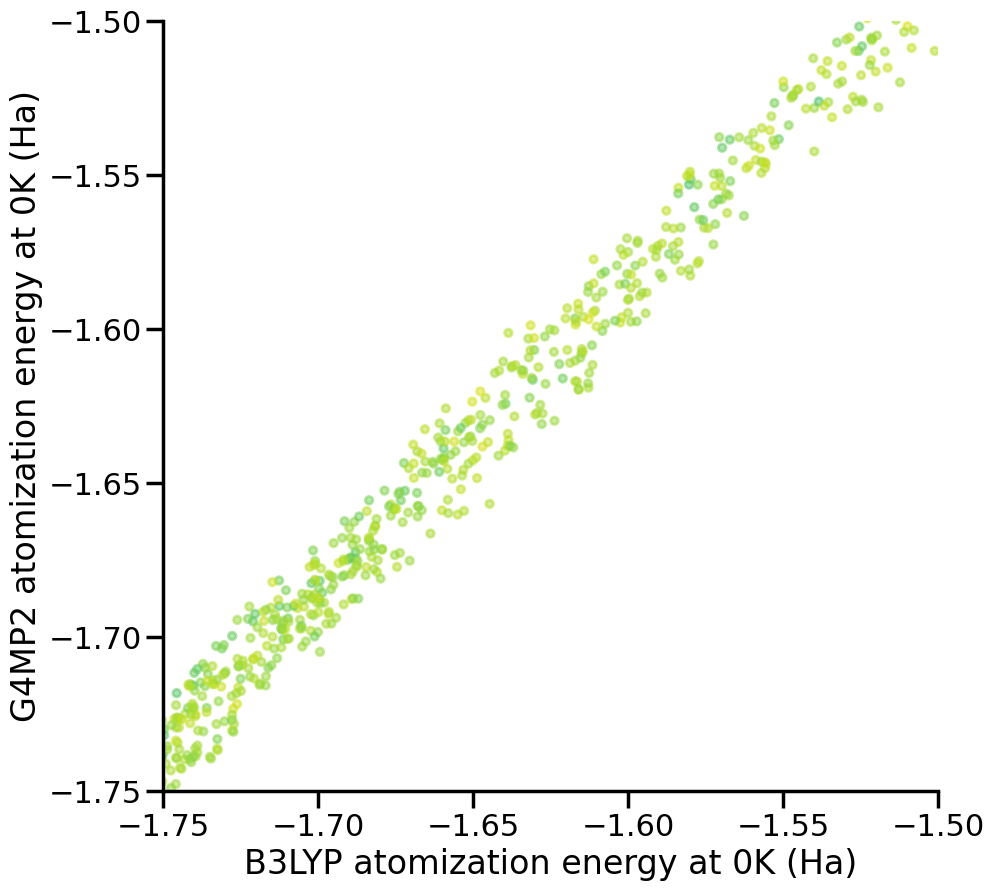

In [11]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(
    X['u0_atom'],
    y['g4mp2_atom'],
    c=y['sol_acn'],
    s=30,
    alpha=0.5
)

plt.xlim(-1.75, -1.5)
plt.ylim(-1.75, -1.5)

ax.set_xlabel("B3LYP atomization energy at 0K (Ha)")
ax.set_ylabel("G4MP2 atomization energy at 0K (Ha)")
sns.despine()

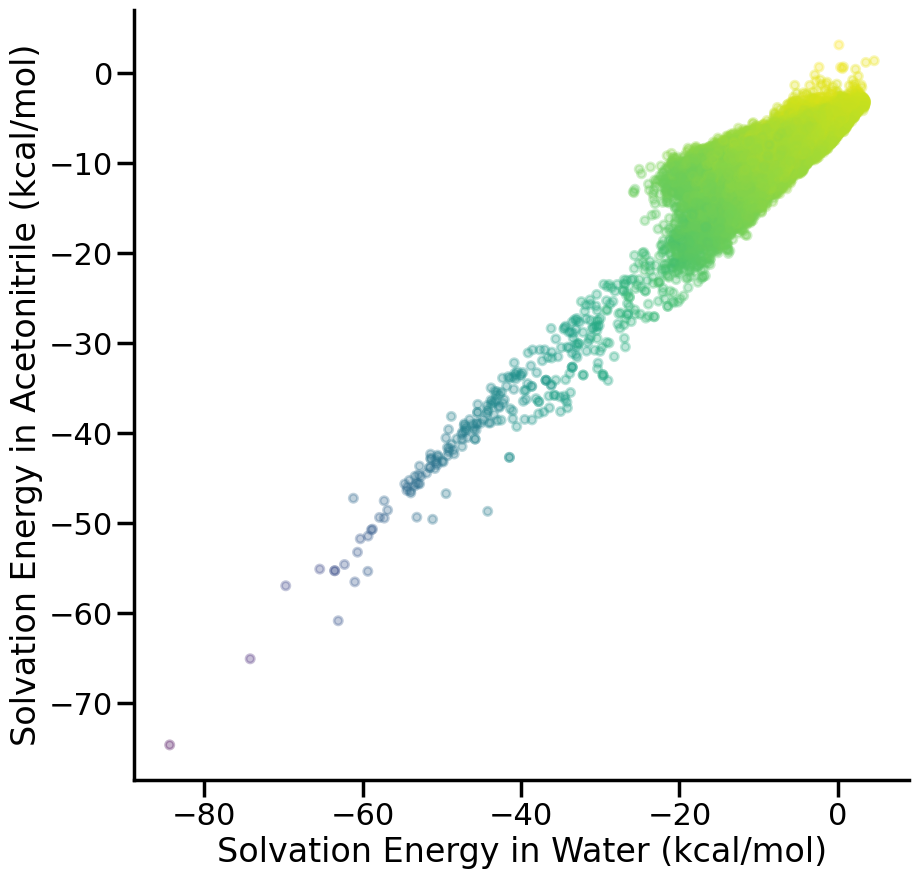

In [12]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(
    y['sol_water'],
    y['sol_acn'],
    c=y['sol_ethanol'],
    s=35,
    alpha=0.3
)

ax.set_xlabel("Solvation Energy in Water (kcal/mol)")
ax.set_ylabel("Solvation Energy in Acetonitrile (kcal/mol)")
sns.despine()

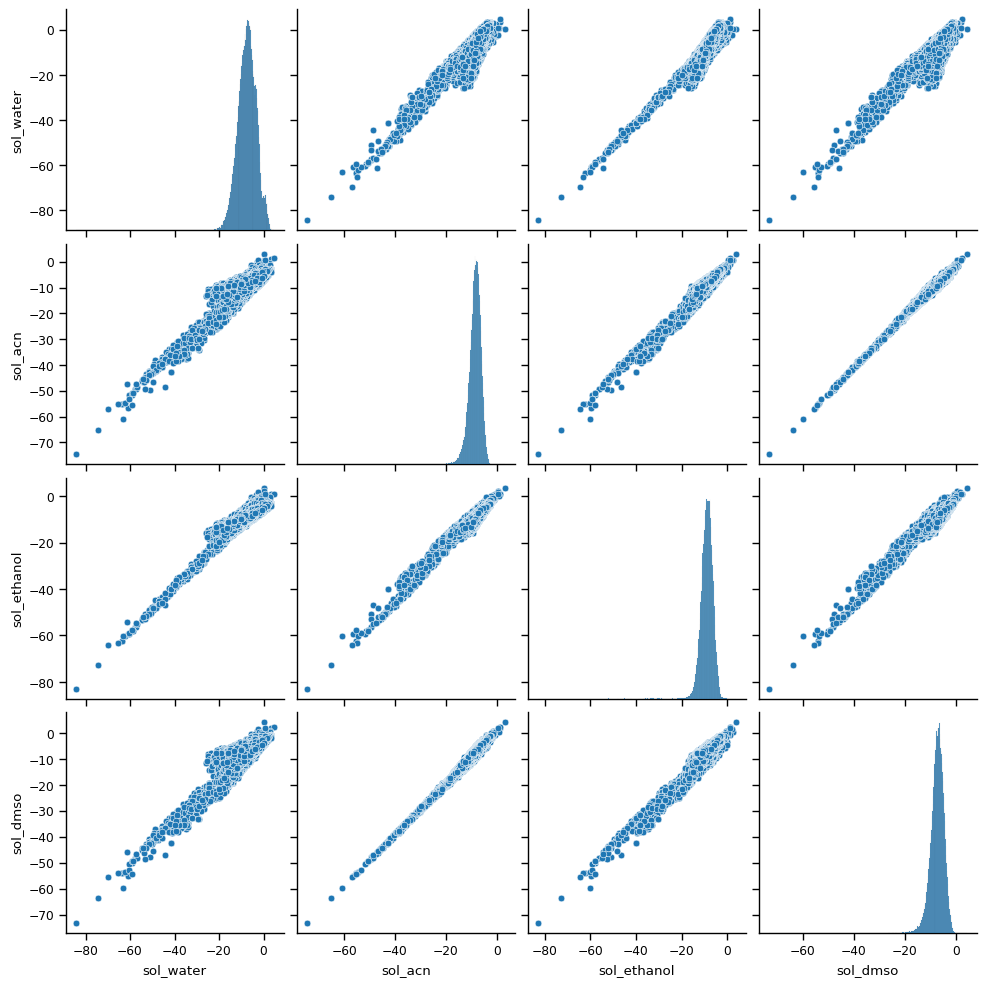

In [13]:
sns.set_context('paper')
sns.pairplot(df[['sol_water', 'sol_acn','sol_ethanol','sol_dmso']])